2.898791645721903e-06 -6.951981889894301e-07 -1.5069150620219982e-06 1.169267207674512e-06 9.5367431640625e-07


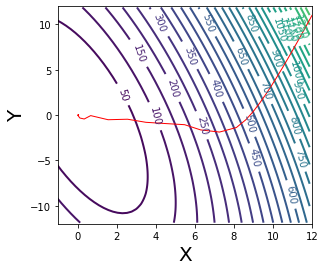

In [2]:
# -*- coding: utf-8 -*-
#共轭梯度优化
import numpy as np
import pylab as pl

F=np.zeros([100,100])
for i in np.arange(0,100): #函数
    for j in np.arange(0,100):
        x0 = i*0.2-10
        y0 = j*0.2-10
        F[i][j] = x0**2+10*y0**2+4*x0*y0
x=12  #初始位置
y=11  #初始位置
dx_old = 0
dy_old = 0
dfdx_old = 0
dfdy_old = 0
deltar=1.0  #初始步长
fold = x**2+10*y**2+4*x*y #函数值
xx=[]
yy=[]
xx.append(x)
yy.append(y)
for i in np.arange(0,2000):
    dfdx = -2*x-4*y  #梯度
    dfdy = -20*y-4*x #梯度
    if i > 0:        
        beta = (dfdx**2+dfdy**2)/(dfdx_old**2+dfdy_old**2)
    else:
        beta = 0
    
    dfdx0 = dfdx/(dfdx**2+dfdy**2)**0.5 #当前梯度方向
    dfdy0 = dfdy/(dfdx**2+dfdy**2)**0.5    

    dx = dfdx0 + beta*dx_old   #当前搜索方向
    dy = dfdy0 + beta*dy_old

    norm = (dx**2 + dy**2)**0.5 #归一化
    dx = dx/norm
    dy = dy/norm
    dx_old = dx
    dy_old = dy
    dfdx_old = dfdx
    dfdy_old = dfdy
    deltax = deltar * dx #搜索步长 x
    deltay = deltar * dy #搜索步长 y   
    x = x + deltax  #更新x
    y = y + deltay  #更新y
    fnew = x**2+10*y**2+4*x*y #新函数值  
    if (fnew>fold):
       x = x - deltax
       y = y - deltay
       deltar = deltar/2.0
    fold = fnew
    xx.append(x)
    yy.append(y)
    if(deltar<1.0e-6):
       print (x,y,deltax,deltay,deltar)
       break
extent = [-12, 12, -12, 12]
fig = pl.figure(figsize=(10,4))
# contour line
ax1 =fig.add_subplot(1,2,1)
levels = np.arange(0.0,2000.0,50.0)
cs = ax1.contour(F,levels,origin='lower',\
                 linewidths=2,extent=extent)
ax1.clabel(cs)
ax1.plot(xx, yy, 'r-',linewidth=1.0)
ax1.set_ylabel(r'Y', fontsize=20)
ax1.set_xlabel(r'X', fontsize=20)
ax1.set_xlim(-1,12)
ax1.set_ylim(-12,12)
pl.show()